In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_max_discharge_capacity(directory):
    # Lister tous les fichiers CSV dans le répertoire donné
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

    # Créer une figure pour le graphique
    plt.figure(figsize=(12, 6))  # Augmenter la largeur de la figure

    # Lire et tracer le maximum de Discharge Capacity pour chaque fichier CSV
    for csv_file in csv_files:
        file_path = os.path.join(directory, csv_file)
        df = pd.read_csv(file_path)

        # Calculer le maximum de Discharge Capacity par Cycle_Index
        max_discharge_capacity = df.groupby('Cycle_Index')['Discharge_Capacity'].max()

        # Tracer le maximum de Discharge Capacity pour chaque Cycle_Index
        plt.plot(max_discharge_capacity.index, max_discharge_capacity.values, label=csv_file)

    plt.xlabel('Cycle Index')
    plt.ylabel('Maximum Discharge Capacity')
    plt.title('Maximum Discharge Capacity vs Cycle Index')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Placer la légende à l'extérieur du graphique
    plt.grid(True)
    plt.tight_layout()  # Ajuster le layout pour que tout soit visible
    plt.show()





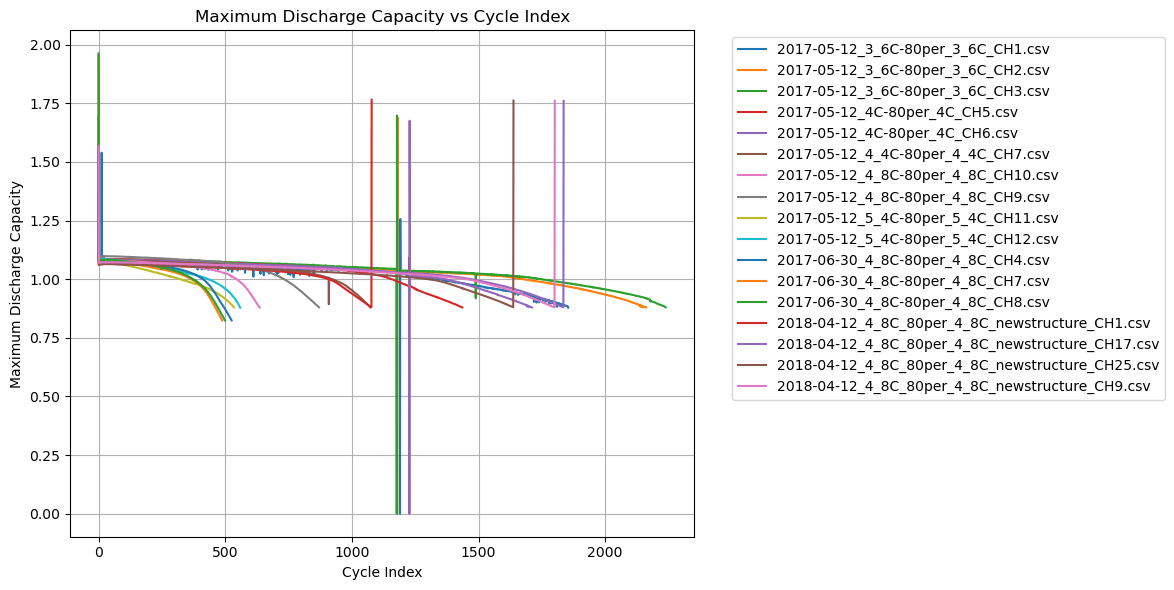

In [9]:

# Exemple d'utilisation
directory = r'C:\Users\pc\Desktop\data\all batchs'  # Utilisation de r pour les chemins Windows
plot_max_discharge_capacity(directory)

Time vs Discharge-Capacity

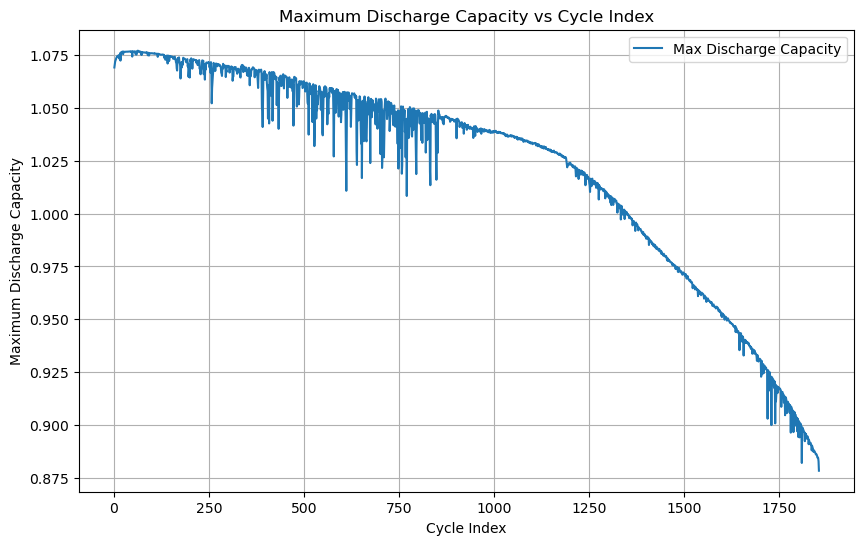

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Étape 1 : Charger les données depuis le fichier CSV
file_path = r'C:\Users\pc\Desktop\data\batch 1\2017-05-12_3_6C-80per_3_6C_CH1.csv'
dfs = pd.read_csv(file_path)

# Supprimer les lignes où Cycle_Index est égal à 0 et 1191
df = dfs[(dfs['Cycle_Index'] != 0) & (dfs['Cycle_Index'] != 1191) & (dfs['Cycle_Index'] != 1190)& (dfs['Cycle_Index'] != 12)]

# Étape 2 : Calculer le maximum de Discharge Capacity par Cycle_Index
max_discharge_capacity = df.groupby('Cycle_Index')['Discharge_Capacity'].max()

# Étape 3 : Tracer les données avec matplotlib
plt.figure(figsize=(10, 6))

# Tracer les données
plt.plot(max_discharge_capacity.index, max_discharge_capacity.values, label='Max Discharge Capacity')

# Ajouter des titres et des labels
plt.title('Maximum Discharge Capacity vs Cycle Index')
plt.xlabel('Cycle Index')
plt.ylabel('Maximum Discharge Capacity')

# Afficher la légende
plt.legend()

# Afficher le graphique
plt.grid(True)
plt.show()


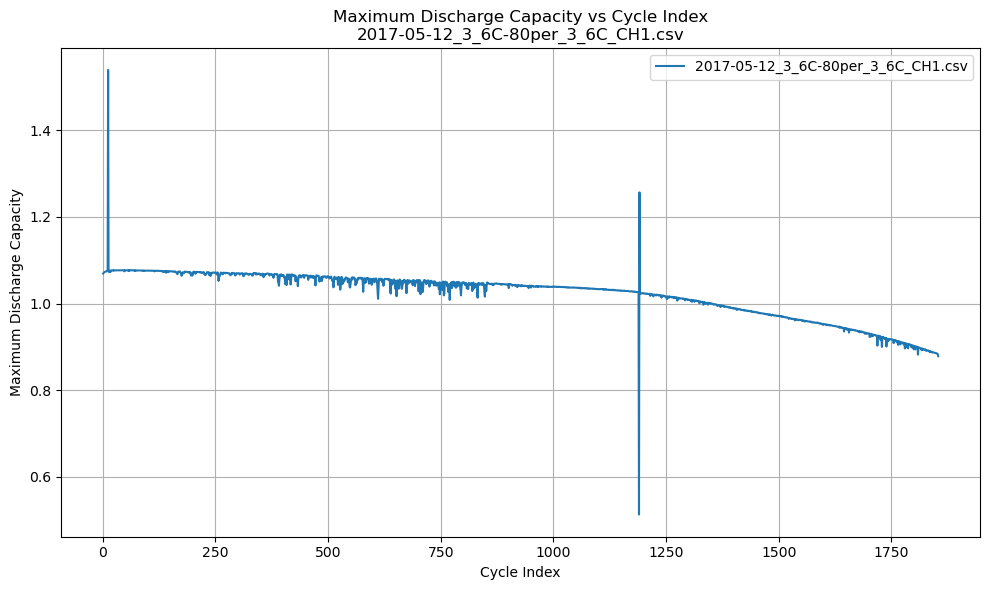

KeyboardInterrupt: 

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def replace_outliers_with_mean(df):
    # Identifier les indices où Discharge_Capacity est en dehors de la plage [0.88, 1.1]
    outliers = (df['Discharge_Capacity'] < 0.88) | (df['Discharge_Capacity'] > 1.1)

    # Remplacer les valeurs aberrantes par la moyenne des valeurs des cycles précédents et suivants
    for idx in df[outliers].index:
        if idx == df.index.min() or idx == df.index.max():
            continue  # Ignorer les premiers et derniers indices où il n'y a pas de précédent ou de suivant
        prev_value = df.at[idx - 1, 'Discharge_Capacity']
        next_value = df.at[idx + 1, 'Discharge_Capacity']
        df.at[idx, 'Discharge_Capacity'] = (prev_value + next_value) / 2

    return df

def plot_each_file_separately(directory):
    # Lister tous les fichiers CSV dans le répertoire donné
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

    # Créer un graphique pour chaque fichier CSV
    for csv_file in csv_files:
        file_path = os.path.join(directory, csv_file)
        dfs = pd.read_csv(file_path)
        df = dfs[dfs['Cycle_Index'] != 0]
        
        # Remplacer les valeurs aberrantes
        df = replace_outliers_with_mean(df)

        # Calculer le maximum de Discharge_Capacity par Cycle_Index
        max_discharge_capacity = df.groupby('Cycle_Index')['Discharge_Capacity'].max()

        # Créer une figure pour le graphique
        plt.figure(figsize=(10, 6))
        plt.plot(max_discharge_capacity.index, max_discharge_capacity.values, label=csv_file)

        # Ajouter des labels et un titre
        plt.xlabel('Cycle Index')
        plt.ylabel('Maximum Discharge Capacity')
        plt.title(f'Maximum Discharge Capacity vs Cycle Index\n{csv_file}')
        plt.legend(loc='upper right')
        plt.grid(True)
        plt.tight_layout()  # Ajuster le layout pour que tout soit visible

        # Afficher le graphique
        plt.show()

directory = r'C:\Users\pc\Desktop\data\all batchs'  # Utilisation de r pour les chemins Windows
plot_each_file_separately(directory)
